### Historical Shape Indicator (HSI),  Multiple Stock Survey Results

These are results from the ETL Market Survey Workbook.  
That ETL uses a composite HSI in attempt to improve indicator performance.  
That ETL has three shape ordinals corresponding to Short, Medium and Long timeframes.  
Each ordinal is associated to their 7 day look forwards.  
The HSI indicators for Short Medium and Long timeframes are distinct.  
They cast votes for a "majority rules" HSC indicator composite as basis for this study.  

For each stock, the data was split into multiple test/train datasets.  
Specifically, three years of data prior was used for training, 1 year post training for testing.  
In this sense, each row here represents a case study spanning four years.  

Approximately 187 stocks were studied, many over ten years span.  
The results come close to 2500 cases, each individually trained, tuned, and tested.  
(The ETL to do this ran constant for around ten hours time.)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Import Processed Data

In [54]:
df_srv = pd.read_csv('stock_survey_102819e.csv')
df_srv = df_srv.dropna()
df_srv.head()

,symbol,equity,test_year,price,lowT,highT,trades,in_days,t-val,p-val,exp_ret,volatility,years,sharpe,beat_pct
0,ABT,ABBOTT LABORATORIES,2002,11.314899,0.31250,0.79375,13,99,4.051459,0.000074,30.835651,0.147148,0.994521,1.869238105,24.331917
1,ABT,ABBOTT LABORATORIES,2003,14.015966,0.27500,0.73750,20,100,-0.796166,0.426895,4.050214,0.120568,0.994521,0.047485822,-0.523296
2,ABT,ABBOTT LABORATORIES,2004,15.372593,0.41250,0.60000,38,128,1.561969,0.119599,15.532756,0.103041,0.997260,1.171907324,9.077632
3,ABT,ABBOTT LABORATORIES,2005,13.312641,0.40625,0.65625,18,99,1.579806,0.115950,8.191178,0.074593,0.989041,0.641070096,5.821230
4,ABT,ABBOTT LABORATORIES,2006,16.874145,0.33750,0.80000,19,94,0.275280,0.783407,12.755089,0.082894,0.986301,1.137870215,6.819800


In [56]:
df_srv['sharpe'] = df_srv['sharpe'].astype(float)
df_srv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951 entries, 0 to 2951
Data columns (total 15 columns):
symbol        2951 non-null object
equity        2951 non-null object
test_year     2951 non-null int64
price         2951 non-null float64
lowT          2951 non-null float64
highT         2951 non-null float64
trades        2951 non-null int64
in_days       2951 non-null int64
t-val         2951 non-null float64
p-val         2951 non-null float64
exp_ret       2951 non-null float64
volatility    2951 non-null float64
years         2951 non-null float64
sharpe        2951 non-null float64
beat_pct      2951 non-null float64
dtypes: float64(10), int64(3), object(2)
memory usage: 368.9+ KB


In [52]:
print(df_srv['sharpe'].tolist())

['1.869238105', '0.047485822', '1.171907324', '0.641070096', '1.137870215', '-0.184470257', '0.873356521', '-1.346825639', '-0.298531238', '0.601737288', '2.529102284', '2.054815186', '2.100244551', '-1.175900227', '0.731002824', '6.487838777', '1.657520934', '1.654762926', '-0.078159279', '1.357337519', '1.42111447', '0.008820244', '1.295228943', '1.990468751', '1.787193549', '0.331645528', '1.205494527', '1.030547367', '-0.18931727', '-0.332872039', '2.10747697', '2.670435841', '-1.044594144', '2.645234901', '2.944364958', '3.169728541', '0.075185208', '1.249366788', '1.291441183', '3.278263673', '1.00839985', '0.871882988', '2.652068714', '-1.037170521', '1.374348138', '1.259904296', '-1.224143727', '0.777376196', '3.320207853', '2.686678295', '-0.336593218', '0.736561775', '0.090803608', '4.993168763', '0.564840651', '1.954844374', '0.459189438', '0.450764189', '-0.502696819', '2.668096565', '1.83224825', '-0.455168364', '0.514873932', '2.009409098', '-0.722578355', '0.508133278', 

#### Stock Tickers of Case Studies
The stock tickers were scraped from 'The Street' on 9/24/19.  
https://www.thestreet.com/stock-market-news/10579592/top-rated-stocks/top-rated-stocks.html

### Survey Analysis

In [17]:
# stock tickers
tickers = df_srv['symbol'].unique().tolist()
tickers.sort()
print(tickers)

['A', 'ABT', 'ACGL', 'ACN', 'ADI', 'AEE', 'AGCO', 'AIN', 'ALG', 'AMGN', 'ANSS', 'APD', 'APO', 'AQN', 'ATR', 'AUDC', 'AWK', 'AWR', 'AXP', 'AZPN', 'BANR', 'BCE', 'BIO-B', 'BLD', 'BR', 'BRC', 'BX', 'CACC', 'CACI', 'CB', 'CBOE', 'CBU', 'CCBG', 'CCMP', 'CE', 'CF', 'CHCO', 'CHD', 'CHEF', 'CIGI', 'CINF', 'CME', 'CNI', 'CNS', 'CSCO', 'CSL', 'CSX', 'CTLT', 'CTRE', 'CW', 'CWCO', 'CWT', 'DAL', 'DE', 'DFS', 'DHI', 'DHR', 'DIOD', 'DRI', 'DTE', 'DTV', 'EBF', 'ECL', 'EME', 'ENTG', 'EPAM', 'ESE', 'ESLT', 'ETN', 'EVRG', 'EXPD', 'EXR', 'FAF', 'FCAP', 'FCFS', 'FFIN', 'FLO', 'FMC', 'FNF', 'FSS', 'GGG', 'GIB', 'GNTX', 'GRMN', 'GWR', 'HE', 'HEI-A', 'HON', 'HXL', 'ICE', 'ICLR', 'IDA', 'IEX', 'INFY', 'IOR', 'IR', 'ITW', 'JBSS', 'JJSF', 'KLAC', 'KNSL', 'KO', 'KSU', 'LDOS', 'LHX', 'LIN', 'LMT', 'LNT', 'LRCX', 'MAIN', 'MANT', 'MDC', 'MDT', 'MEDP', 'MGA', 'MGIC', 'MRK', 'MSFT', 'MTH', 'MTZ', 'NBHC', 'NCBS', 'NDAQ', 'NEE', 'NEU', 'NSC', 'NVR', 'NVS', 'ODFL', 'OKE', 'OTTR', 'PCAR', 'PEP', 'PGR', 'PHM', 'POOL', 'PRF

In [18]:
# company names 
equities = df_srv['equity'].unique().tolist()
equities.sort()
print(equities)

['ABBOTT LABORATORIES', 'ACCENTURE PLC', 'AGCO CORP', 'AGILENT TECHNOLOGIES INC', 'AIR PRODUCTS & CHEMICALS INC', 'ALAMO GROUP INC', 'ALBANY INTL CORP', 'ALGONQUIN POWER & UTIL CORP', 'ALLIANT ENERGY CORP', 'AMEREN CORP', 'AMERICAN EXPRESS CO', 'AMERICAN STATES WATER CO', 'AMERICAN WATER WORKS CO INC', 'AMGEN INC', 'ANALOG DEVICES', 'ANSYS INC', 'APOLLO GLOBAL MGMT INC', 'APTARGROUP INC', 'ARCH CAPITAL GROUP LTD', 'ASPEN TECHNOLOGY INC', 'AUDIOCODES LTD', 'BANNER CORP', 'BCE INC', 'BERKLEY (W R) CORP', 'BIO-RAD LABORATORIES INC', 'BLACKSTONE GROUP INC', 'BRADY CORP', 'BROADRIDGE FINANCIAL SOLUTNS', 'CABOT MICROELECTRONICS CORP', 'CACI INTL INC', 'CALIFORNIA WATER SERVICE GP', 'CANADIAN NATIONAL RAILWAY CO', 'CAPITAL CITY BK GROUP INC', 'CARETRUST REIT INC', 'CARLISLE COS INC', 'CATALENT INC', 'CBOE GLOBAL MARKETS INC', 'CELANESE CORP', 'CF INDUSTRIES HOLDINGS INC', 'CGI INC', "CHEFS' WAREHOUSE INC", 'CHUBB LTD', 'CHURCH & DWIGHT INC', 'CINCINNATI FINANCIAL CORP', 'CISCO SYSTEMS INC', '

In [19]:
len(equities)

185

#### Test Years

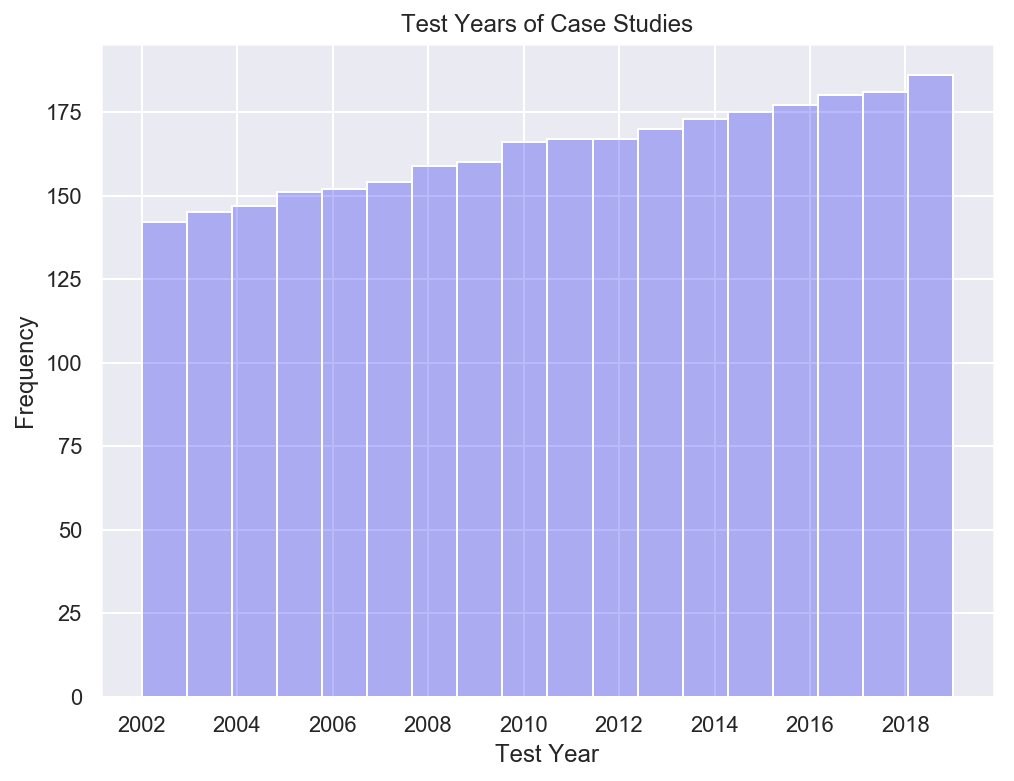

In [29]:
# test year histogram
years = df_srv['test_year']
plt.figure(figsize=(8,6))
plt.xlabel("Test Year")
plt.ylabel("Frequency")
plt.title("Test Years of Case Studies")
plt.xticks(np.arange(2002, 2020, step=2))
plt.hist(years,18,(2002,2019), color = (.1,.1,.95,.3));

#### Stock Nominal Year Price Histogram

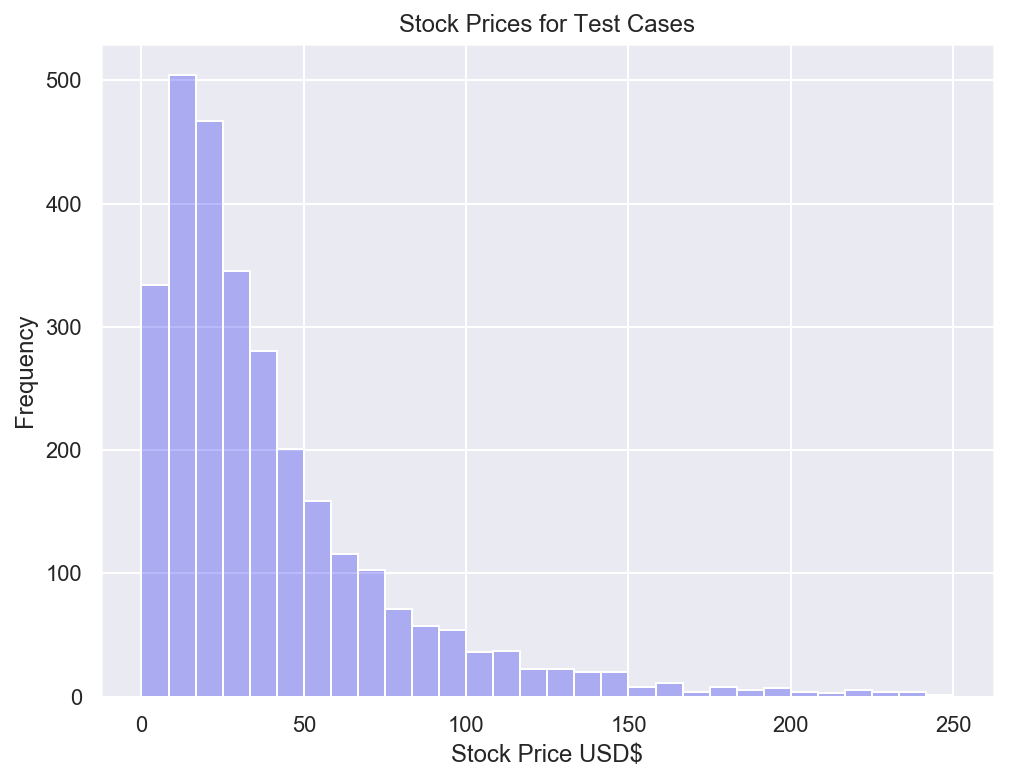

In [30]:
# stock price histogram
prices = df_srv['price']
plt.figure(figsize=(8,6))
plt.xlabel("Stock Price USD$")
plt.ylabel("Frequency")
plt.title("Stock Prices for Test Cases")
plt.hist(prices.dropna(),30,(0,250), color = (.1,.1,.95,.3));

Small portfolios necessarily need small stock prices.  
This is to manage the risk of ruin.  
Only a small percentage of the total portfolio is risked on any single trade.  
When a trade goes bad, the intent is to offset losses with gains from other trades.  
This follows a principle of diversity where many eggs are kept in separate baskets.  
Four different shares at 50USD are preferred over one share at 200USD.  
This graphic supports that idea.

In [31]:
# price statistics
prices.describe()

count    2952.000000
mean       49.944431
std       129.604608
min         0.212894
25%        14.968890
50%        28.459784
75%        53.998832
max      3748.012500
Name: price, dtype: float64

#### Indicator Threshold Values

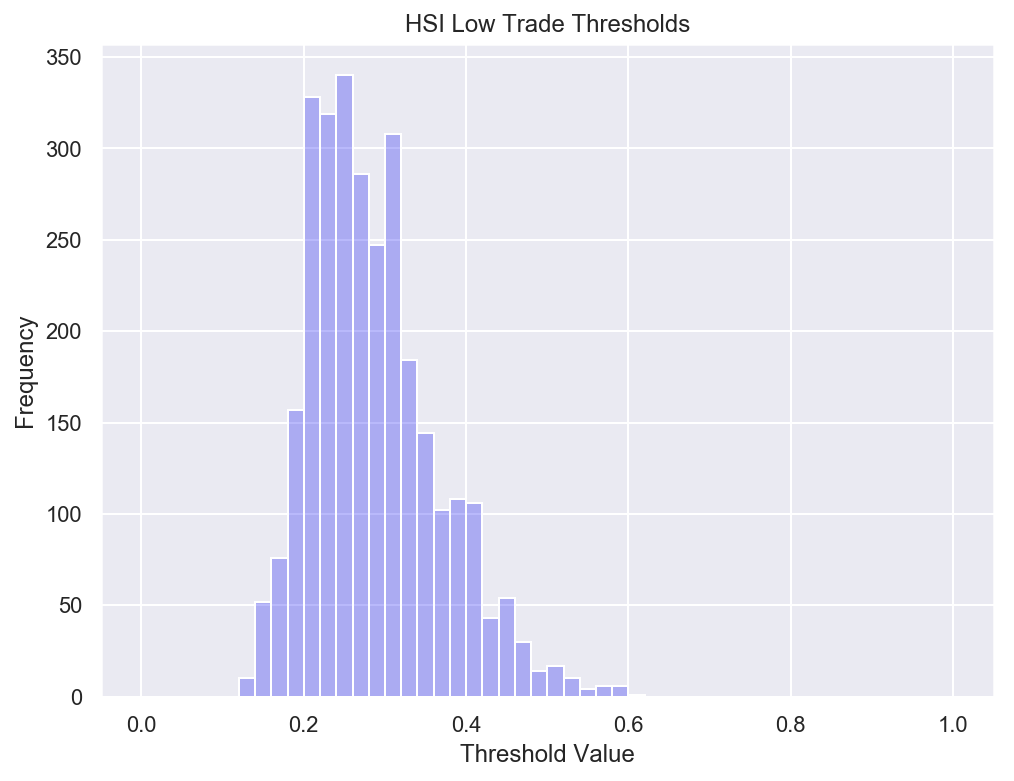

In [32]:
# low threshold histogram
lowTs = df_srv['lowT']
plt.figure(figsize=(8,6))
plt.xlabel("Threshold Value")
plt.ylabel("Frequency")
plt.title("HSI Low Trade Thresholds")
plt.hist(lowTs.dropna(),50,(0,1), color = (.1,.1,.95,.3));

This graphis shows that one size does not fit all.
The optimized tuning varies with the Test case.

In [33]:
lowTs.describe()

count    2952.000000
mean        0.285743
std         0.079149
min         0.125000
25%         0.231250
50%         0.275000
75%         0.331250
max         0.600000
Name: lowT, dtype: float64

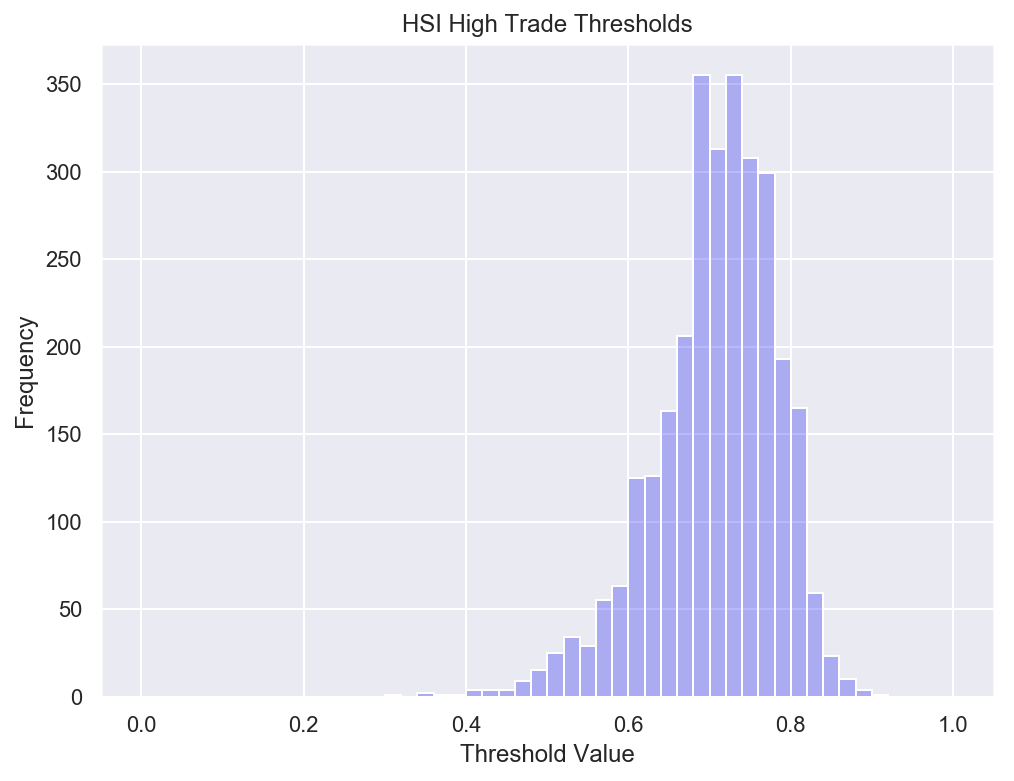

In [34]:
# High threshold histogram
highTs = df_srv['highT']
plt.figure(figsize=(8,6))
plt.xlabel("Threshold Value")
plt.ylabel("Frequency")
plt.title("HSI High Trade Thresholds")
plt.hist(highTs.dropna(),50,(0,1), color = (.1,.1,.95,.3));

The high threshold seems to mirror image of the low threshold.

In [35]:
highTs.describe()

count    2952.000000
mean        0.707556
std         0.075533
min         0.312500
25%         0.668750
50%         0.718750
75%         0.762500
max         0.906250
Name: highT, dtype: float64

#### Number of Trades in Test Year

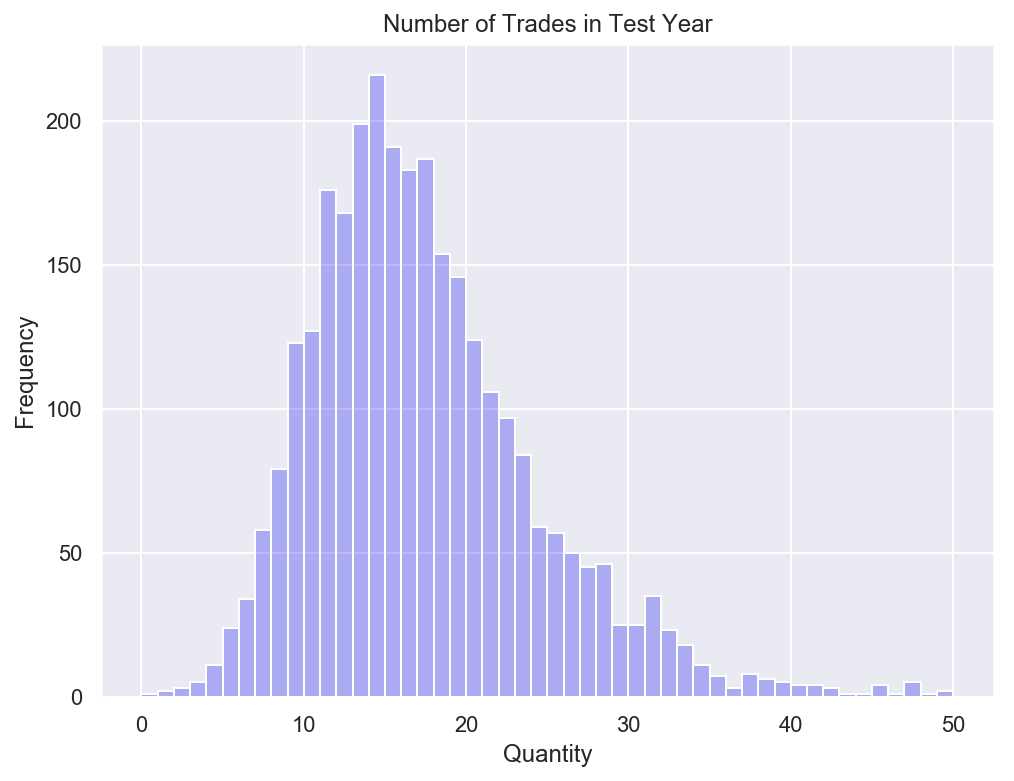

In [36]:
# High threshold histogram
num_trades = df_srv['trades']
plt.figure(figsize=(8,6))
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Number of Trades in Test Year")
plt.hist(num_trades.dropna(),50,(0,50), color = (.1,.1,.95,.3));

This project is not intended for day trading.  
The number of trades are typically less than two per month in any one market.

In [37]:
# trade count statistics
num_trades.describe()

count    2952.000000
mean       16.971545
std         7.238766
min         0.000000
25%        12.000000
50%        16.000000
75%        21.000000
max        82.000000
Name: trades, dtype: float64

#### In The Market Trade Days

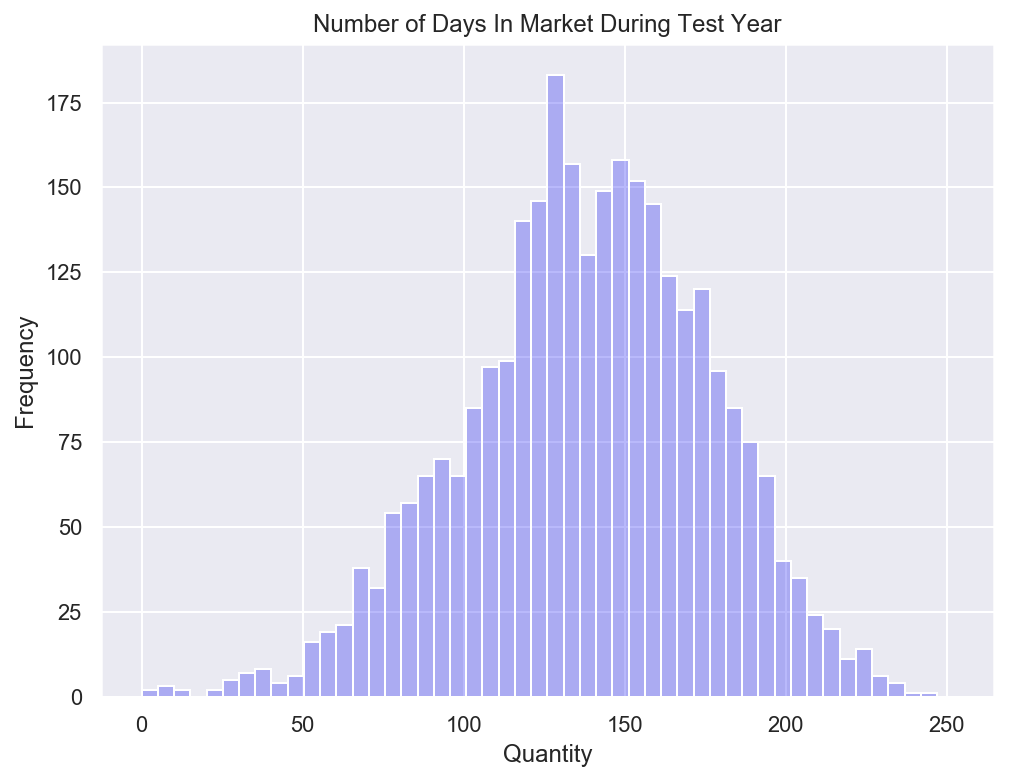

In [38]:
# Number of days in the market histogram
in_days = df_srv['in_days']
plt.figure(figsize=(8,6))
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Number of Days In Market During Test Year")
plt.hist(in_days.dropna(),50,(0,252), color = (.1,.1,.95,.3));

The long trading style is a "buy and hold" strategy.  
A day trader might push up against the high quantity  side.  

In [39]:
in_days.describe()

count    2952.000000
mean      138.472561
std        38.086900
min         0.000000
25%       114.750000
50%       140.000000
75%       165.000000
max       243.000000
Name: in_days, dtype: float64

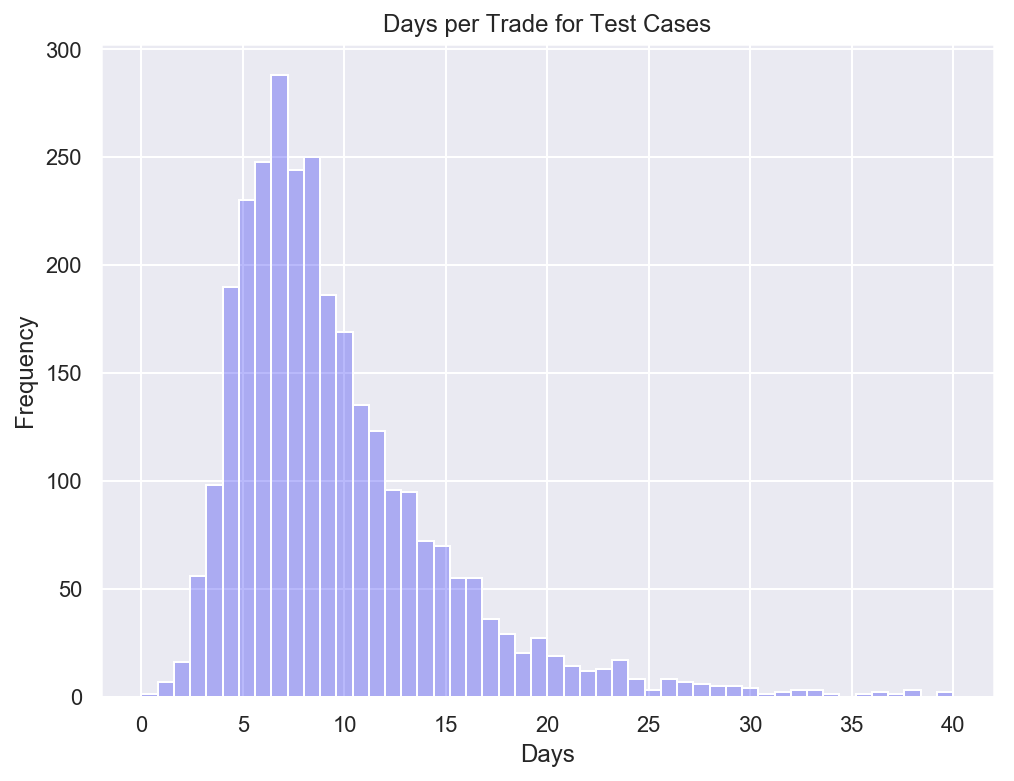

In [40]:
# Days per Trade histogram
days_per_trade = df_srv['in_days']/df_srv['trades']
plt.figure(figsize=(8,6))
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Days per Trade for Test Cases")
plt.hist(days_per_trade.dropna(),50,(0,40), color = (.1,.1,.95,.3));

The trade duration supports the idea of a couple trades per month.

In [41]:
days_per_trade.describe()

count    2951.000000
mean        9.832847
std         6.551615
min         0.500000
25%         6.052632
50%         8.266667
75%        11.822917
max       114.500000
dtype: float64

#### T-Test Results
These are the results of the Equal Sample Unequal Variance Two-Tail Test.  
In this case the null hypothessi relates to no difference between returns,  
in the market using the trade rules, and out of the market using trade rules.  
The test samples for minimum counts between the two, then samples the larger  
case for equal samples.

In the case where no significance is found, the indicator plays less of a factor.  
In the case where the p-value is small, the indicator plays a greater role.  

Keep in Mind there's a "Cherry Picked Stock" effect supporting high returns.  
Here, the idea is the indicator can be wrong and it's not a big disaster.  
This complements long strategies disqualified from Bear markets.

In other words, "The Trend Is Your Friend."

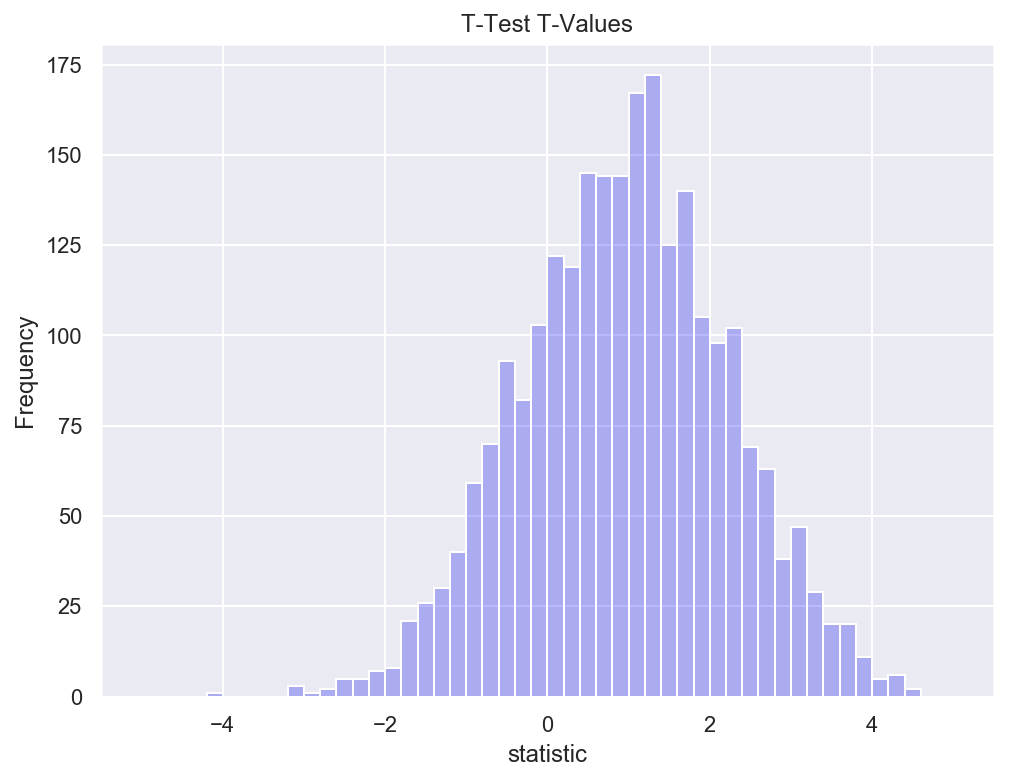

In [19]:
# T Values histogram
t_vals = df_srv['t-val']
plt.figure(figsize=(8,6))
plt.xlabel("statistic")
plt.ylabel("Frequency")
plt.title("T-Test T-Values")
plt.hist(t_vals.dropna(),50,(-5,5), color = (.1,.1,.95,.3));

In [20]:
t_vals.describe()

count    2452.000000
mean        0.961278
std         1.275325
min        -4.113971
25%         0.072429
50%         0.992066
75%         1.807989
max         5.470146
Name: t-val, dtype: float64

The t-values measure size of the difference relative to variation in the data.  
As t increases, the null hypothesis becomes less likely.  
That these are peaking off zero, supports some value added by the indicator.  

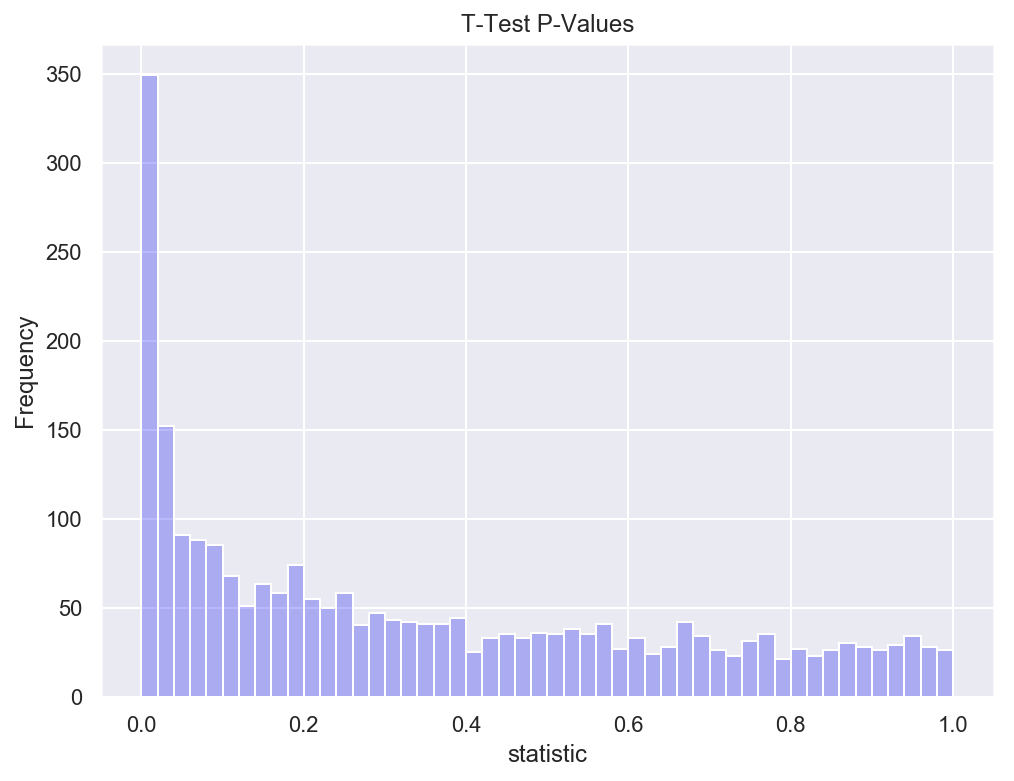

In [21]:
# P Values histogram
p_vals = df_srv['p-val']
plt.figure(figsize=(8,6))
plt.xlabel("statistic")
plt.ylabel("Frequency")
plt.title("T-Test P-Values")
plt.hist(p_vals.dropna(),50,(0,1), color = (.1,.1,.95,.3));

In [22]:
p_vals.describe()

count    2.452000e+03
mean     3.406601e-01
std      3.024180e-01
min      1.130000e-07
25%      6.536209e-02
50%      2.556715e-01
75%      5.747830e-01
max      9.995030e-01
Name: p-val, dtype: float64

The statistics indicate that the lower quartile is coming in at 0.065;  
this suggests something significant going on with ~1/4 of the group.  

Unfortunately, with an average days in the market of 135,   
that's also the number of samples per t-test here.  
Such a low number of samples may not be sufficient for detecting  
return differences of interest.

In any case, as the p-value drops might suggest episodes where  
in the market trades gave greater return than not; it's not entirely futile.

#### Expected Returns  
The log returns are converted to simple percentages.  
In most cases, the test case spans one year.  
Since 2019 is partial, the returns for those are lower.

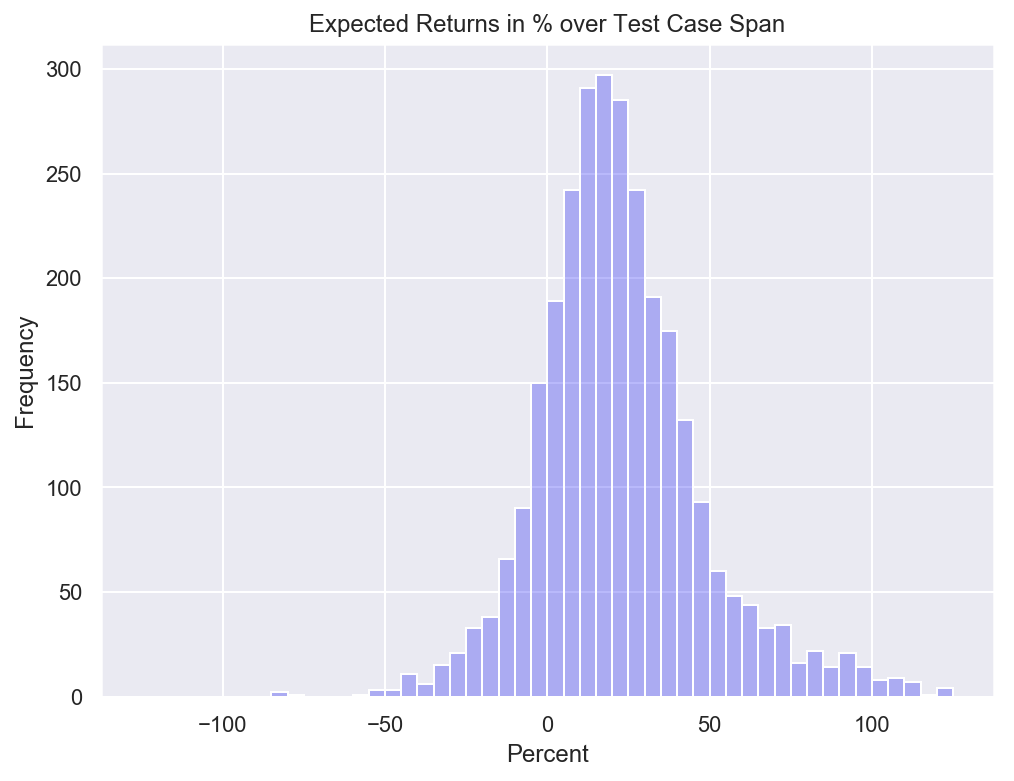

In [45]:
# P Values histogram
exp_rets = df_srv[df_srv['exp_ret']<125]['exp_ret']
plt.figure(figsize=(8,6))
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.title("Expected Returns in % over Test Case Span")
plt.hist(exp_rets.dropna(),50,(-125,125), color = (.1,.1,.95,.3));

In [46]:
exp_rets.describe()

count    2912.000000
mean       22.469160
std        25.410110
min       -84.552658
25%         7.060812
50%        19.947168
75%        35.098052
max       122.810152
Name: exp_ret, dtype: float64

In the big picture, a practical approach to stock trading seems this:  
win more times than you lose, "cut your losses and let your winners run."

The expected returns histogram here supports this idea.

#### Trade Volatility

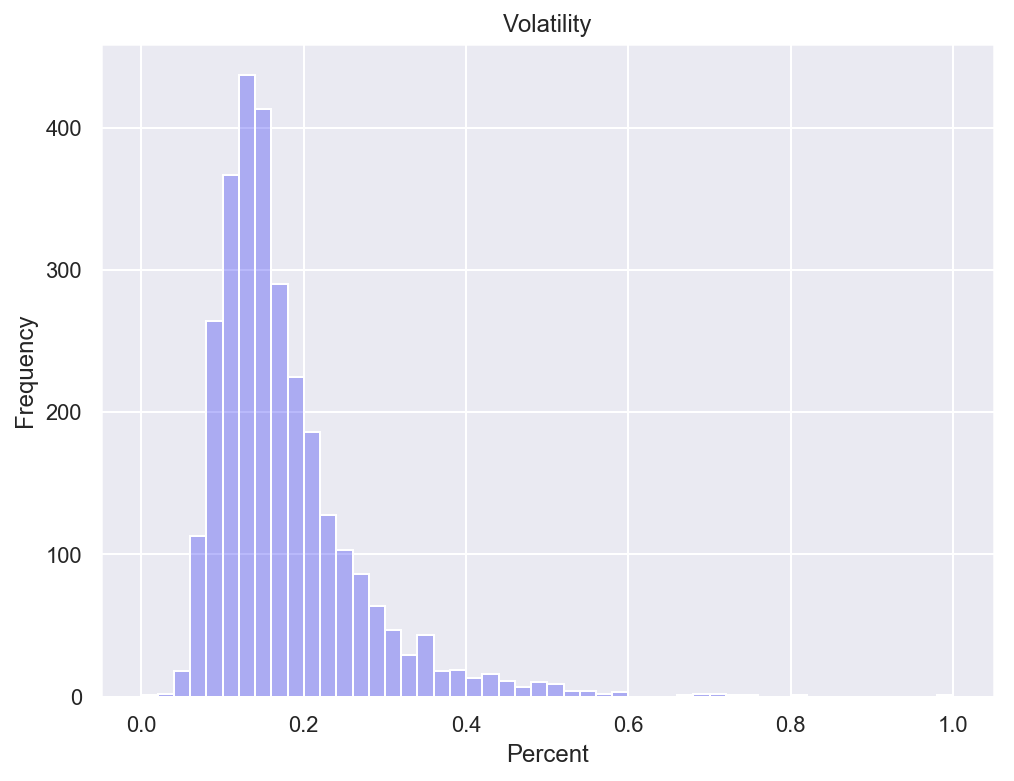

In [47]:
# P Values histogram
exp_rets = df_srv[df_srv['volatility']<1]['volatility']
plt.figure(figsize=(8,6))
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.title("Volatility")
plt.hist(exp_rets.dropna(),50,(0,1), color = (.1,.1,.95,.3));

In [48]:
df_srv[df_srv['volatility']<1]['volatility'].describe()

count    2941.000000
mean        0.175805
std         0.089480
min         0.000000
25%         0.118442
50%         0.152260
75%         0.207829
max         0.994076
Name: volatility, dtype: float64

#### Sharpe Ratio
This reveals degrees of health in the trades,   
higher as better and too high as suspicious.

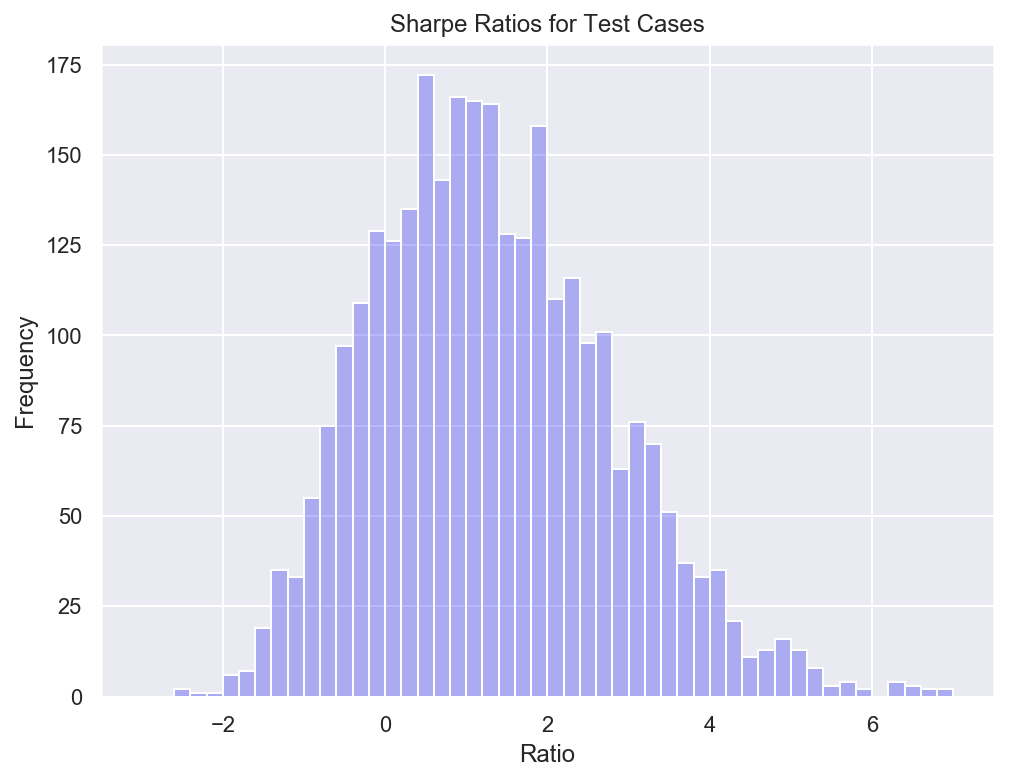

In [57]:
# Sharpe ratio histogram
sharpes = df_srv[df_srv['sharpe']<10]['sharpe']
plt.figure(figsize=(8,6))
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Sharpe Ratios for Test Cases")
plt.hist(sharpes.dropna(),50,(-3,7), color = (.1,.1,.95,.3));

In [58]:
sharpes.describe()

count    2947.000000
mean        1.334406
std         1.479830
min        -2.574456
25%         0.276946
50%         1.196291
75%         2.274569
max         8.342204
Name: sharpe, dtype: float64

A sharpe ratio >1 is considered good.  
That the mean value exceeds 1 supports the idea many trades are healthy. 

Note the expected returns problem manifests here likewise and are filtered out.

#### Market Benchmark
The difference to the S&P500 indicate the percentage the trades beat the market.  
This comparison is stock to benchmark on similar days "in the market."  
As most test cases are one year terms, the percentage indicated is roughly per year.  

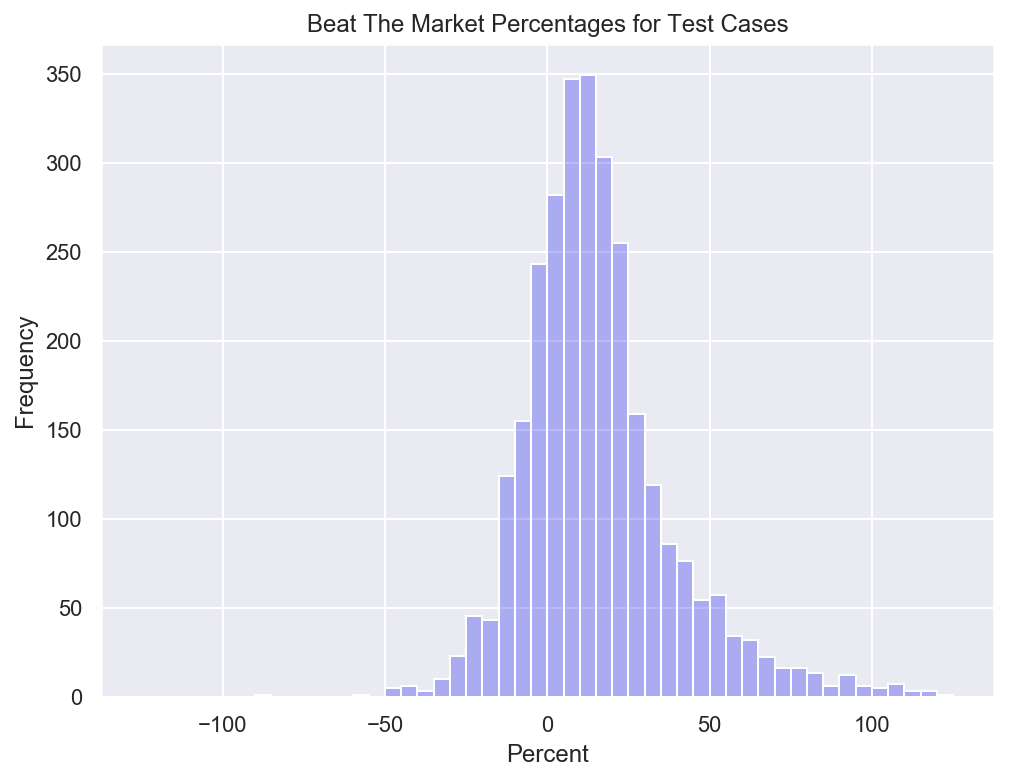

In [62]:
# Beat Percentage histogram
beats = df_srv[df_srv['beat_pct']<125]['beat_pct']
plt.figure(figsize=(8,6))
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.title("Beat The Market Percentages for Test Cases")
plt.hist(beats.dropna(),50,(-125,125), color = (.1,.1,.95,.3));

In [63]:
beats.describe()

count    2922.000000
mean       15.516568
std        22.973685
min       -85.988816
25%         1.144715
50%        12.048570
75%        24.939119
max       123.862928
Name: beat_pct, dtype: float64

The lower quartile is within 2% of even.  
This indicates that ~3/4 of the cases beat the market.  
On average, beating the market by 9% is expected.  
In the worst case, it was complete ruin.  

As in the Expected Returns and Sharpe cases,  
high runners were omitted.

#### Ticker Rank Sorting  
The idea here is that some stocks likely complement this trade approach better than others.  
We aim to do "Cherry Picking" on the "Cherry Picked", for improving out chances.  
We want "the best bang for the buck" so to speak.    

Sharpe ratios are used for this pursuit because they factor volatility risks.

In [64]:
df_srv = df_srv.sort_values(by=['sharpe'], ascending=False)
df_rnk = df_srv[df_srv['sharpe']<10].copy()
df_recent = df_rnk[df_rnk['test_year']>2017]
df_recent.head(30)

,symbol,equity,test_year,price,lowT,highT,trades,in_days,t-val,p-val,exp_ret,volatility,years,sharpe,beat_pct
2280,ENTG,ENTEGRIS INC,2019,47.9550,0.28125,0.68125,18,128,4.145721,0.000063,98.224692,0.175586,0.789041,6.890411,81.748070
1412,BLD,TOPBUILD CORP,2019,101.6575,0.30000,0.74375,18,131,1.241180,0.216645,104.175516,0.193938,0.789041,6.627289,106.472870
1128,JBSS,SANFILIPPO JOHN B&SON,2019,95.8200,0.39375,0.72500,19,107,1.727236,0.085987,60.428997,0.113450,0.789041,6.442101,36.376534
1277,TMHC,TAYLOR MORRISON HOME CORP,2019,27.4925,0.38750,0.52500,20,135,3.916001,0.000145,86.278938,0.188028,0.789041,5.629284,67.100778
2850,LHX,L3HARRIS TECHNOLOGIES INC,2019,198.9725,0.26250,0.75000,7,163,3.323195,0.001375,75.040267,0.163273,0.791781,5.590266,61.608458
2389,FAF,FIRST AMERICAN FINANCIAL CP,2019,59.7675,0.36875,0.50625,24,150,3.041752,0.003259,52.035996,0.112875,0.791781,5.512291,28.665430
922,PRFT,PERFICIENT INC,2019,38.2100,0.33125,0.61250,30,131,1.430880,0.154796,69.270248,0.160230,0.789041,5.260600,50.388694
1704,CNI,CANADIAN NATIONAL RAILWAY CO,2019,87.5300,0.26875,0.74375,11,88,3.440604,0.000731,37.900464,0.084678,0.789041,5.259176,9.072176
397,WRB,BERKLEY (W R) CORP,2019,70.6625,0.21250,0.67500,17,102,3.222683,0.001498,38.424440,0.086552,0.789041,5.222014,24.077564
2245,EME,EMCOR GROUP INC,2019,88.0175,0.27500,0.75625,12,107,2.494518,0.013508,51.056254,0.119584,0.789041,5.118307,30.689798


Many of the top 30 entries from 2018 and 2019 exhibit (relatively) low p-values.  
Also it seems like 2019 is a good year for stock trading.  

#### Efficiency Frontier

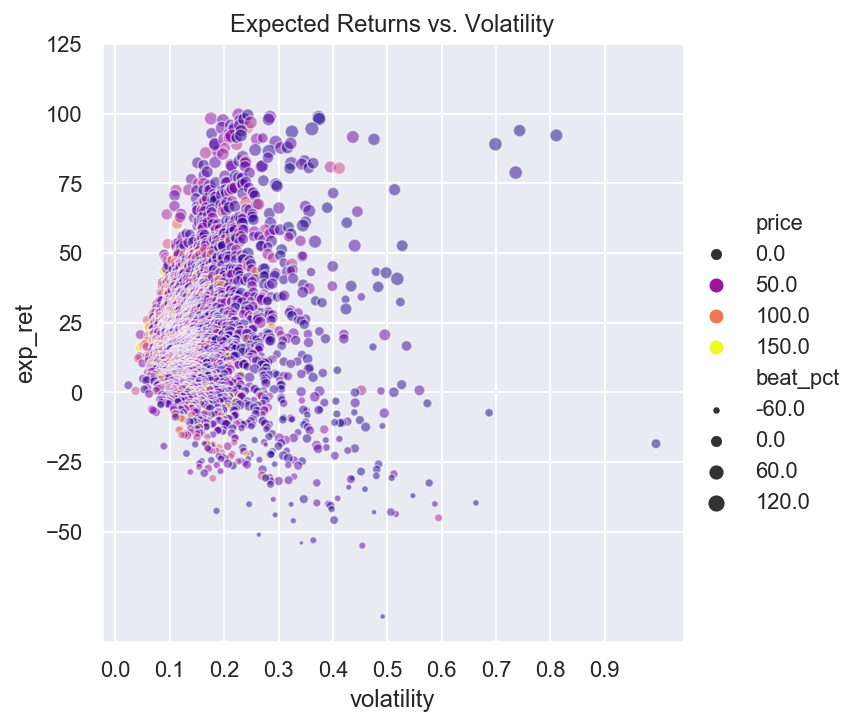

In [74]:
# Trade Efficiency Frontier
data_ef = df_rnk[((df_rnk['volatility']<1)&(df_rnk['exp_ret']<100))&(df_rnk['price']<150)]
plt.figure(figsize=(12, 8))
g = sb.relplot(x='volatility', y='exp_ret', 
               hue = 'price', size = 'beat_pct', 
               sizes=(5, 50), alpha=.5, 
               palette="plasma", data = data_ef)
g.set(title = 'Expected Returns vs. Volatility')
g.set(yticks=np.arange(-50, 150, step=25))
g.set(xticks=np.arange(0, 1, step=0.1));

The most "efficient" portfolios utilize maximum returns at a given risk tolerance.  
These reside along the top edge of the scatterplot.  
These likewise embody the largest sharpe ratio's.   

#### Timewise Results

C:\Users\Gamer\Python\Anaconda3\envs\hmm-tagger\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


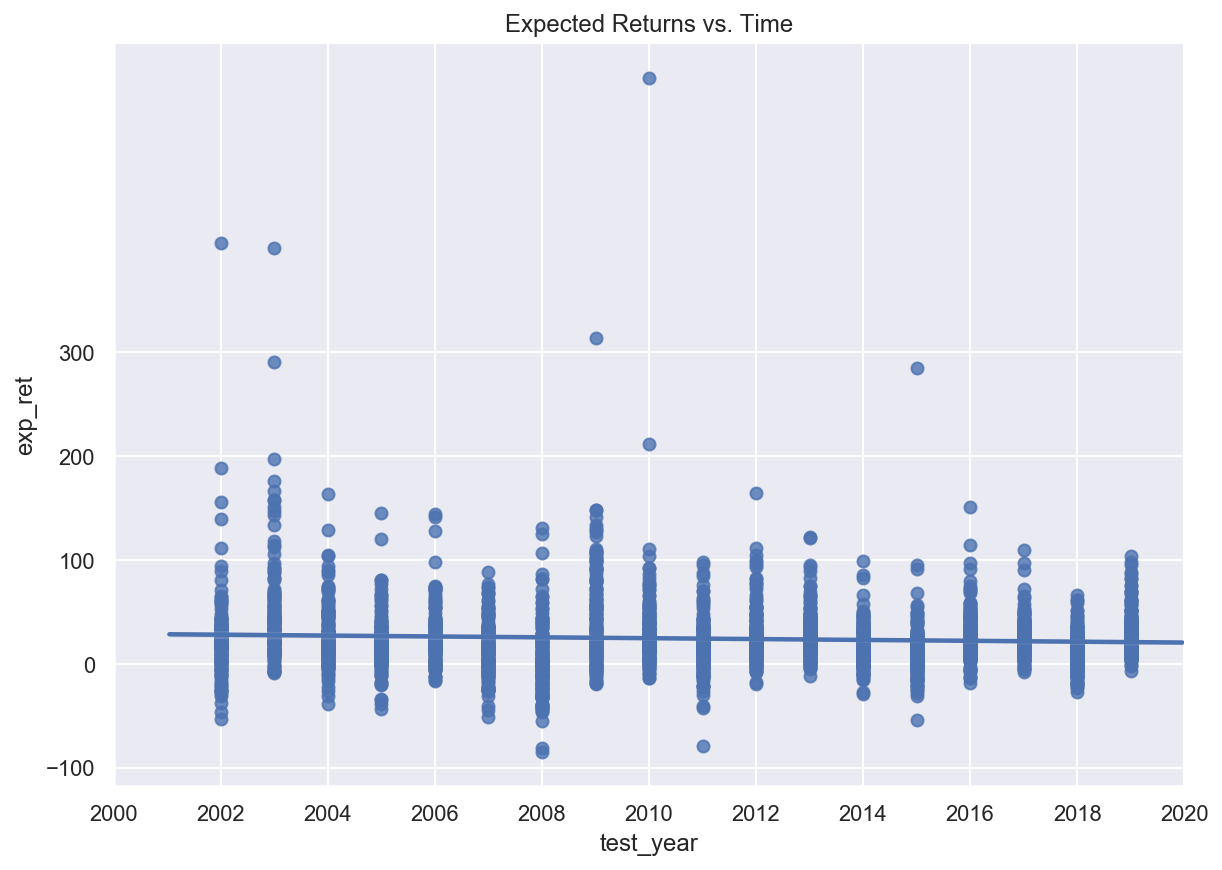

In [75]:
# Expected Return by Years
g = sb.lmplot(x='test_year', y='exp_ret', data = df_rnk,
              height=6, aspect=11.7/8.27)
g.set(title = 'Expected Returns vs. Time')
g.set(xticks=np.arange(2000, 2022, step=2))
g.set(yticks=np.arange(-100, 400, step=100));

In the extremes, the upside hits 100% gain more than the downside hitting 100% loss.

C:\Users\Gamer\Python\Anaconda3\envs\hmm-tagger\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


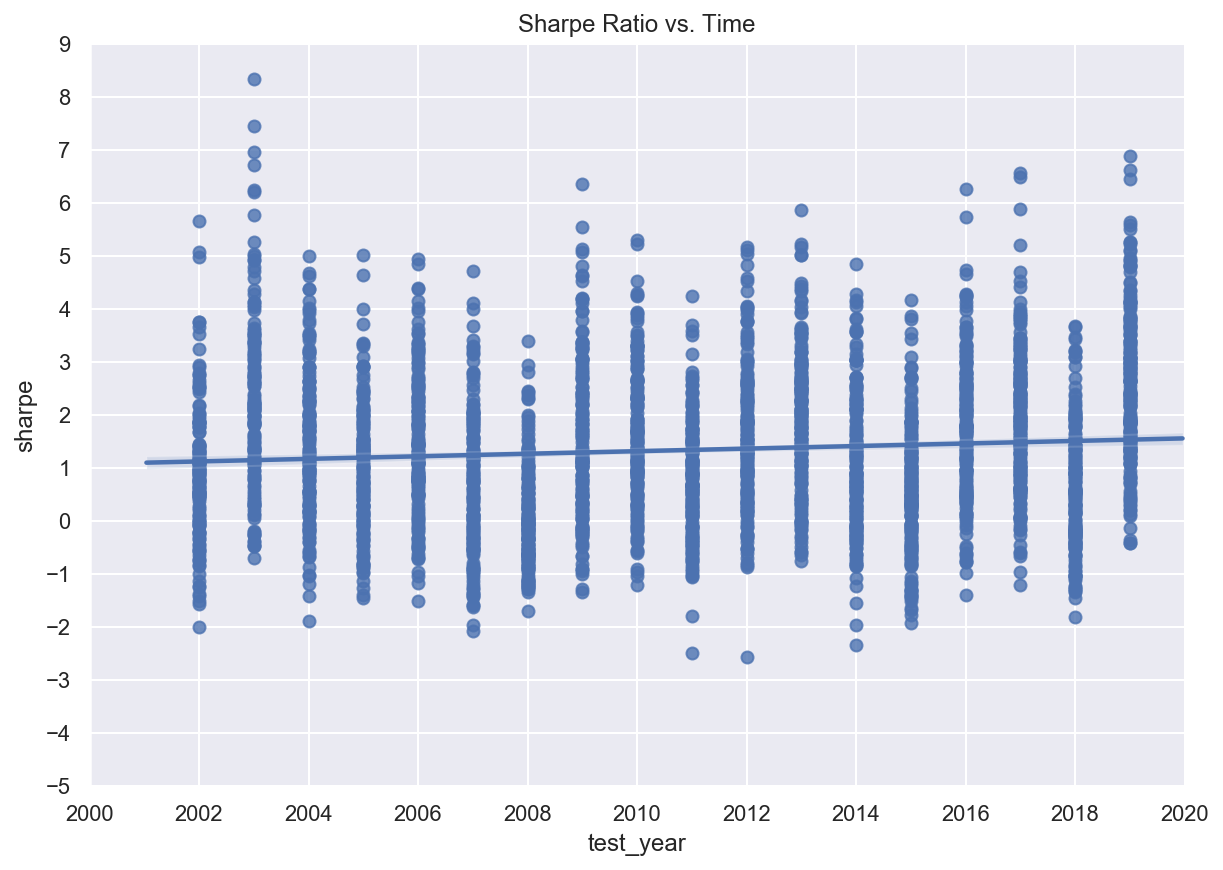

In [76]:
# Sharpe Ratio by Years
g = sb.lmplot(x='test_year', y='sharpe', data = df_rnk,
              height=6, aspect=11.7/8.27)
g.set(title = 'Sharpe Ratio vs. Time')
g.set(xticks=np.arange(2000, 2022, step=2))
g.set(yticks=np.arange(-5, 10, step=1));

The Sharpe Ratio performance on average seems somewhat good over the years.

C:\Users\Gamer\Python\Anaconda3\envs\hmm-tagger\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


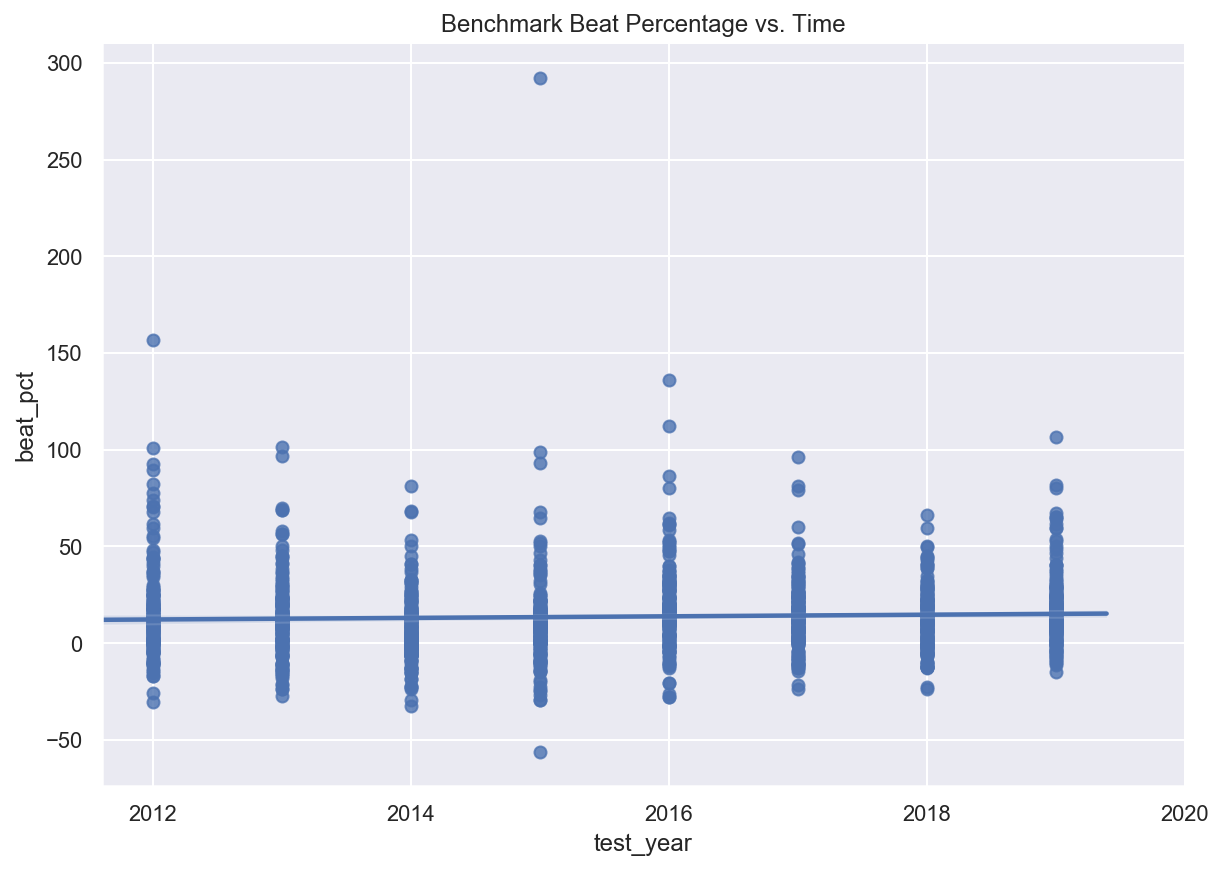

In [78]:
# Beat Percentage by Years
g = sb.lmplot(x='test_year', y='beat_pct', data = df_rnk[df_rnk['test_year']>2011],
              height=6, aspect=11.7/8.27)
g.set(title = 'Benchmark Beat Percentage vs. Time')
g.set(xticks=np.arange(2012, 2022, step=2));

The visual suggests a slight upward trend with majority above zero.

### Stock Selection Export  
Tickers are sorted based on analysis and exported.

In [84]:
candidates = df_recent[(((df_recent['volatility']<0.25)&\
                        (df_recent['price']<150))&\
                       ((df_recent['beat_pct']>10)))&\
                        (df_recent['sharpe']>2)]
candidates.head(25)

,symbol,equity,test_year,price,lowT,highT,trades,in_days,t-val,p-val,exp_ret,volatility,years,sharpe,beat_pct
2280,ENTG,ENTEGRIS INC,2019,47.9550,0.28125,0.68125,18,128,4.145721,0.000063,98.224692,0.175586,0.789041,6.890411,81.748070
1412,BLD,TOPBUILD CORP,2019,101.6575,0.30000,0.74375,18,131,1.241180,0.216645,104.175516,0.193938,0.789041,6.627289,106.472870
1128,JBSS,SANFILIPPO JOHN B&SON,2019,95.8200,0.39375,0.72500,19,107,1.727236,0.085987,60.428997,0.113450,0.789041,6.442101,36.376534
1277,TMHC,TAYLOR MORRISON HOME CORP,2019,27.4925,0.38750,0.52500,20,135,3.916001,0.000145,86.278938,0.188028,0.789041,5.629284,67.100778
2389,FAF,FIRST AMERICAN FINANCIAL CP,2019,59.7675,0.36875,0.50625,24,150,3.041752,0.003259,52.035996,0.112875,0.791781,5.512291,28.665430
922,PRFT,PERFICIENT INC,2019,38.2100,0.33125,0.61250,30,131,1.430880,0.154796,69.270248,0.160230,0.789041,5.260600,50.388694
397,WRB,BERKLEY (W R) CORP,2019,70.6625,0.21250,0.67500,17,102,3.222683,0.001498,38.424440,0.086552,0.789041,5.222014,24.077564
2245,EME,EMCOR GROUP INC,2019,88.0175,0.27500,0.75625,12,107,2.494518,0.013508,51.056254,0.119584,0.789041,5.118307,30.689798
271,APO,APOLLO GLOBAL MGMT INC,2019,39.8275,0.53125,0.65000,27,77,2.385463,0.018294,70.318966,0.167959,0.789041,5.097634,59.368475
307,ACGL,ARCH CAPITAL GROUP LTD,2019,42.0550,0.16875,0.72500,11,125,1.179407,0.240153,42.865710,0.102439,0.789041,4.961615,29.743696


In [91]:
set(candidates.test_year.tolist())

{2018, 2019}

In [85]:
cherries = candidates.symbol.unique()
print(cherries)

['ENTG' 'BLD' 'JBSS' 'TMHC' 'FAF' 'PRFT' 'WRB' 'EME' 'APO' 'ACGL' 'TER'
 'TREX' 'TXN' 'WCN' 'FSS' 'PEP' 'SAIA' 'CTLT' 'UPS' 'BRC' 'CNS' 'FNF'
 'ALG' 'CCMP' 'MTH' 'AQN' 'SAFT' 'CBU' 'AWR' 'ETN' 'PCAR' 'WM' 'FMC'
 'CTRE' 'FFIN' 'AWK' 'LNT' 'GNTX' 'KNSL' 'HEI-A' 'CSCO' 'KSU' 'CWCO'
 'SPXC' 'LDOS' 'GIB' 'ROST' 'CW' 'CF' 'WST' 'TGT' 'GWR' 'CHD' 'AUDC'
 'SNPS' 'OKE' 'TPVG' 'PHM' 'MDC' 'DHI' 'SCL' 'ESE' 'FCAP' 'IDA' 'CSL'
 'NDAQ' 'CIGI' 'GRMN' 'MSFT' 'TTC' 'AIN' 'CWT' 'MDT' 'FCFS' 'MGIC' 'RSG'
 'RPM' 'CHEF' 'CBOE' 'NVS' 'ADI' 'SPNS' 'TMUS' 'NBHC' 'MRK' 'PGR' 'TTEK'
 'DRI']


In [86]:
len(cherries)

88

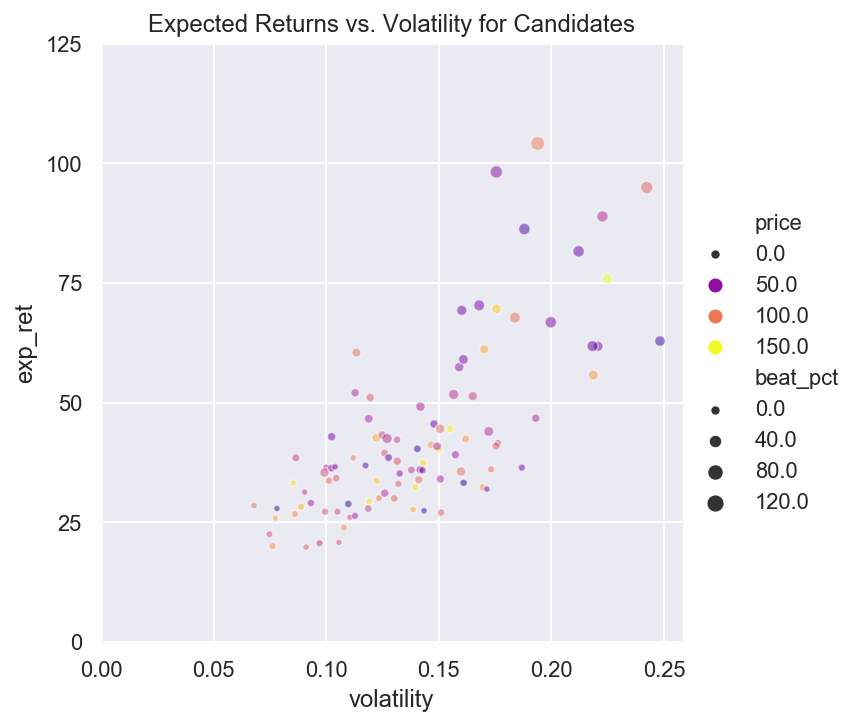

In [92]:
# Trade Efficiency Frontier for candidates
plt.figure(figsize=(12, 8))
g = sb.relplot(x='volatility', y='exp_ret', 
               hue = 'price', size = 'beat_pct', 
               sizes=(10, 50), alpha=.5, 
               palette="plasma", data = candidates)
g.set(title = 'Expected Returns vs. Volatility for Candidates')
g.set(yticks=np.arange(0, 150, step=25))
g.set(xticks=np.arange(0, 0.3, step=0.05));

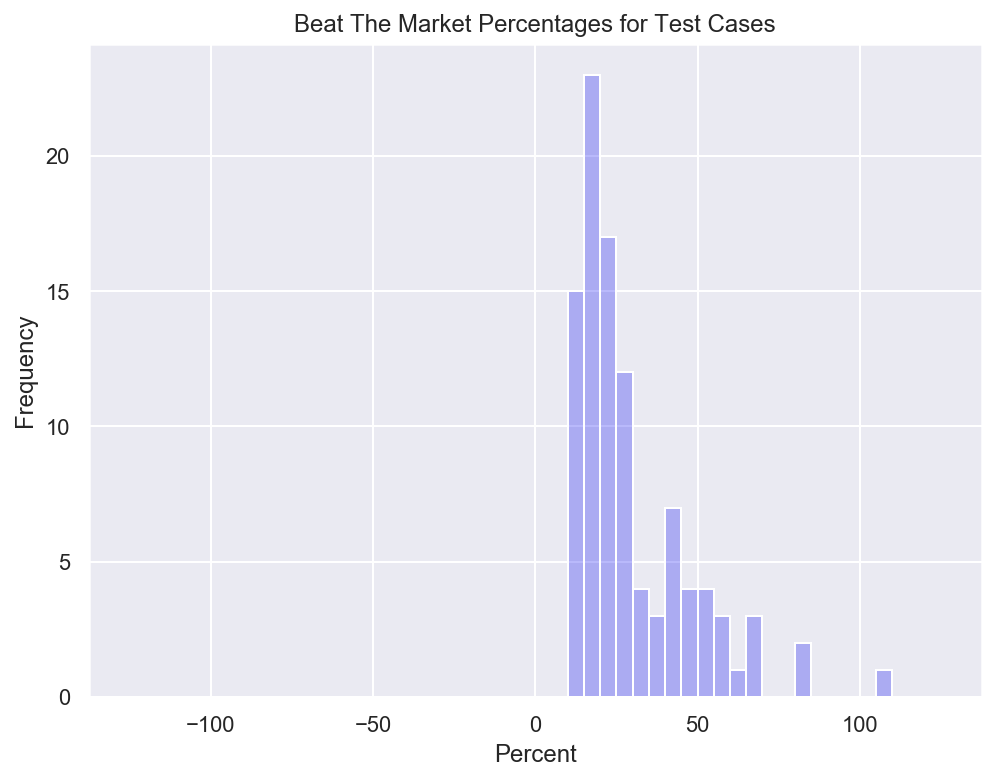

In [89]:
# Beat Percentage histogram
beats = candidates['beat_pct']
plt.figure(figsize=(8,6))
plt.xlabel("Percent")
plt.ylabel("Frequency")
plt.title("Beat The Market Percentages for Candidates")
plt.hist(beats.dropna(),50,(-125,125), color = (.1,.1,.95,.3));

In [93]:
candidates.to_csv('cherries_102919.csv')

#### Summary Survey Analysis  
The features from the market trade survey were reviewed.  
The market trade survey was based on use of the HSI indicator.  
The study included about 150 stocks over a ten year span.

A trade approach using this indicator does not work in all cases.  

Market personalities differ.  
In some cases, the market personality complements the indicator.  
It may be that the indicator placed trades as a happy accident.  
Or it may be that the market seemed to cooperate in some way.  
In other cases, the use of the indicator and the market seem incompatible.  

The trading approach study in no way eliminates losing trades.  
On many occurances, the trade returns were found to be negative.  
On more occurances, they were found to be positive.  
Follow on improvment seems warranted to reduce losing trades.  
From there, trading would be more fool-proof.  
However, that is beyond the scope of this project.

### Disclaimer: this notebook is intended for educational purposes only and not recommended for real trading.